In [ ]:
import pandas as pd
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the dataset
data = pd.read_csv('/content/train.csv')


In [ ]:
# Function to clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text


In [ ]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import os


# Calculate the class distribution
class_counts = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the class distribution using Plotly
fig = px.bar(x=class_counts.index, y=class_counts.values, title='Class Distribution of Toxic Comments', labels={'x': 'Class', 'y': 'Count'}, width=800, height=400)
fig.update_traces(marker_color='indigo', marker_line_width=2, marker_line_color='black')
fig.show()

# Combine all text data
text_data = ' '.join(data['comment_text'])

# Generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100, contour_width=1, contour_color='black').generate(text_data)

# Convert the word cloud to an image array
wordcloud_image = wordcloud.to_array()

# Plot the word cloud using Plotly
fig_wordcloud = px.imshow(wordcloud_image, title='Comments', width=1000, height=1000)
fig_wordcloud.update_xaxes(visible=False)
fig_wordcloud.update_yaxes(visible=False)
fig_wordcloud.show()

# Calculate the length of each comment
data['comment_length'] = data['comment_text'].apply(lambda x: len(x.split()))

# Plot the comment length distribution using Plotly
fig_length = px.histogram(data, x='comment_length', nbins=50, title='Comment Length Distribution', labels={'comment_length': 'Number of Words', 'count': 'Frequency'}, width=800, height=400)
fig_length.update_traces(marker_color='blue', marker_line_width=2, marker_line_color='black')
fig_length.show()

# Create a new column for positive vs negative comments
data['comment_type'] = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
data['comment_type'] = data['comment_type'].apply(lambda x: 'negative' if x > 0 else 'positive')

# Plot the distribution of positive vs negative comments using Plotly
comment_type_counts = data['comment_type'].value_counts()
fig_comment_type = px.bar(x=comment_type_counts.index, y=comment_type_counts.values, title='Distribution of Positive vs Negative Comments', labels={'x': 'Comment Type', 'y': 'Count'}, width=400, height=400)
fig_comment_type.update_traces(marker_color='green', marker_line_width=2, marker_line_color='black')
fig_comment_type.show()


In [ ]:
# Apply cleaning function to the comment_text column
data['cleaned_comment_text'] = data['comment_text'].apply(clean_text)
# Extract features and labels
X = data['cleaned_comment_text']
y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=102)


In [ ]:
# Prepare data for simple classification models
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train1)
X_test_tfidf = tfidf_vectorizer.transform(X_test1)


In [ ]:
# Train a Logistic Regression model
logreg_model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
logreg_model.fit(X_train_tfidf, y_train1)
# Evaluate Logistic Regression model
performance_lr = classification_report(y_test1, logreg_model.predict(X_test_tfidf), target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], zero_division=0)
print("Logistic Regression Model Performance:")
print(performance_lr)


Logistic Regression Model Performance:
               precision    recall  f1-score   support

        toxic       0.91      0.61      0.73      4576
 severe_toxic       0.53      0.22      0.31       491
      obscene       0.92      0.64      0.75      2545
       threat       0.80      0.11      0.19       150
       insult       0.82      0.52      0.64      2363
identity_hate       0.68      0.21      0.32       437

    micro avg       0.87      0.56      0.68     10562
    macro avg       0.78      0.38      0.49     10562
 weighted avg       0.86      0.56      0.67     10562
  samples avg       0.05      0.05      0.05     10562



In [ ]:
# Train a Random Forest model
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))
rf_model.fit(X_train_tfidf, y_train1)
from sklearn.metrics import classification_report
# Evaluate Random Forest model
performance_rf = classification_report(y_test1, rf_model.predict(X_test_tfidf), target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], zero_division=0)
print("Random Forest Model Performance:")
print(performance_rf)


Random Forest Model Performance:
               precision    recall  f1-score   support

        toxic       0.86      0.66      0.75      4576
 severe_toxic       0.46      0.07      0.11       491
      obscene       0.87      0.73      0.79      2545
       threat       0.71      0.03      0.06       150
       insult       0.76      0.58      0.66      2363
identity_hate       0.68      0.10      0.18       437

    micro avg       0.83      0.60      0.70     10562
    macro avg       0.72      0.36      0.42     10562
 weighted avg       0.81      0.60      0.68     10562
  samples avg       0.06      0.05      0.05     10562



In [ ]:
# Define prediction functions for each model
def predict(text, model_choice):
    cleaned_text = clean_text(text)
    transformed_text = tfidf_vectorizer.transform([cleaned_text])

    if model_choice == "Logistic Regression":
        prediction = logreg_model.predict(transformed_text)
    elif model_choice == "Random Forest":
        prediction = rf_model.predict(transformed_text)

    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    prediction_dict = {labels[i]: int(prediction[0][i]) for i in range(len(labels))}

    return prediction_dict

import gradio as gr

# Create Gradio interface with a dropdown for model selection
def predict_interface(text, model_choice):
    prediction_dict = predict(text, model_choice)
    return prediction_dict

interface = gr.Interface(
    fn=predict_interface,
    inputs=[
        gr.Textbox(lines=2, placeholder='Enter comment text here...'),
        gr.Dropdown(choices=["Logistic Regression", "Random Forest"], label="Select Model")
    ],
    outputs=gr.Label(num_top_classes=6),
    title="Hate Speech Classifier",
    description="Enter a comment and select a model to classify its toxicity."
)

# Launch the Gradio interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e4412c021e6e028130.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('wordnet')
# Load the dataset, try skipping bad lines
data_path = '/content/train.csv'  # Store the file path in a variable
# Read the CSV file without specifying usecols to see all columns
data = pd.read_csv(data_path, on_bad_lines='skip', quoting=3)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,"""id""","""comment_text""","""toxic""","""severe_toxic""","""obscene""","""threat""","""insult""","""identity_hate"""
0,"""0000997932d777bf""","""Explanation",NaN,NaN,NaN,NaN,NaN,NaN
1,Why the edits made under my username Hardcore ...,just closure on some GAs after I voted at New...,0,0,0,0,0,0
2,"""0001b41b1c6bb37e""","""""""",NaN,NaN,NaN,NaN,NaN,NaN
3,More,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I can't make any real suggestions on improveme...,"or a subsection of """"""""types of accidents""""""""...",if no-one else does first - if you have any p...,NaN,NaN,NaN,NaN,NaN


Skipping line for word: 105.80
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 200, 100)          2000000   
                                                                 
 spatial_dropout1d_3 (Spati  (None, 200, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_27 (LSTM)              (None, 200, 128)          117248    
                                                                 
 dropout_18 (Dropout)        (None, 200, 128)          0         
                                                                 
 lstm_28 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 6)                 390       
                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


998/998 [==============================] - 7s 7ms/step
               precision    recall  f1-score   support

        toxic       0.87      0.70      0.77      3056
 severe_toxic       0.53      0.25      0.34       321
      obscene       0.86      0.73      0.79      1715
       threat       0.69      0.15      0.24        74
       insult       0.76      0.65      0.70      1614
identity_hate       0.62      0.35      0.45       294

    micro avg       0.82      0.66      0.73      7074
    macro avg       0.72      0.47      0.55      7074
 weighted avg       0.81      0.66      0.72      7074
  samples avg       0.06      0.06      0.06      7074



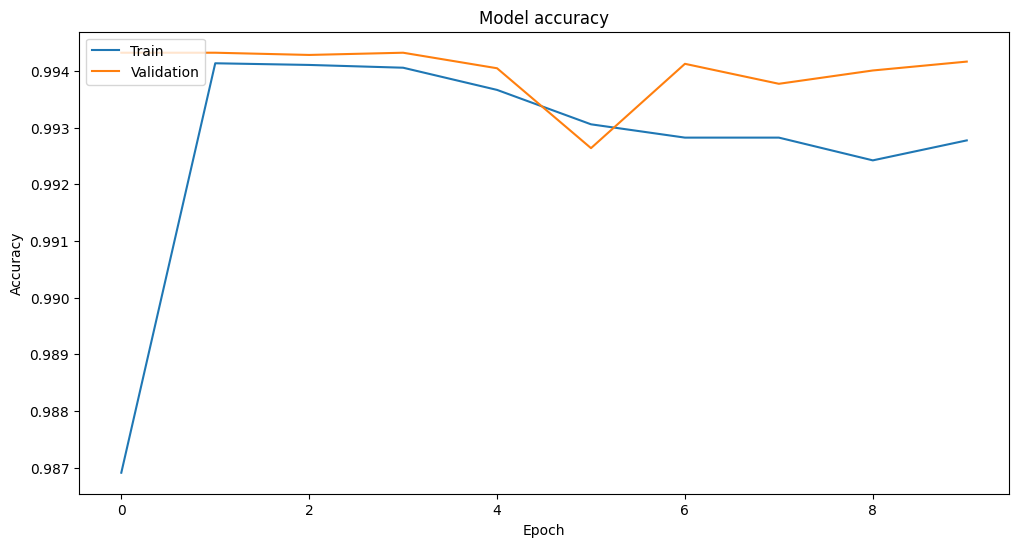

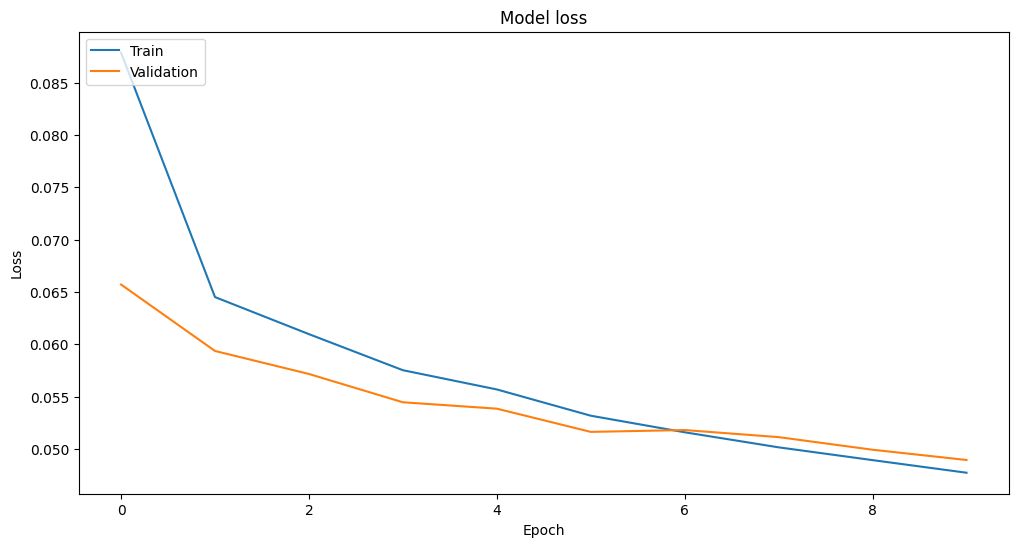

           Class  Precision    Recall  F1 Score
0          toxic   0.867343  0.699607  0.774497
1   severe_toxic   0.532895  0.252336  0.342495
2        obscene   0.855782  0.733528  0.789953
3         threat   0.687500  0.148649  0.244444
4         insult   0.756718  0.645601  0.696757
5  identity_hate   0.615385  0.353741  0.449244


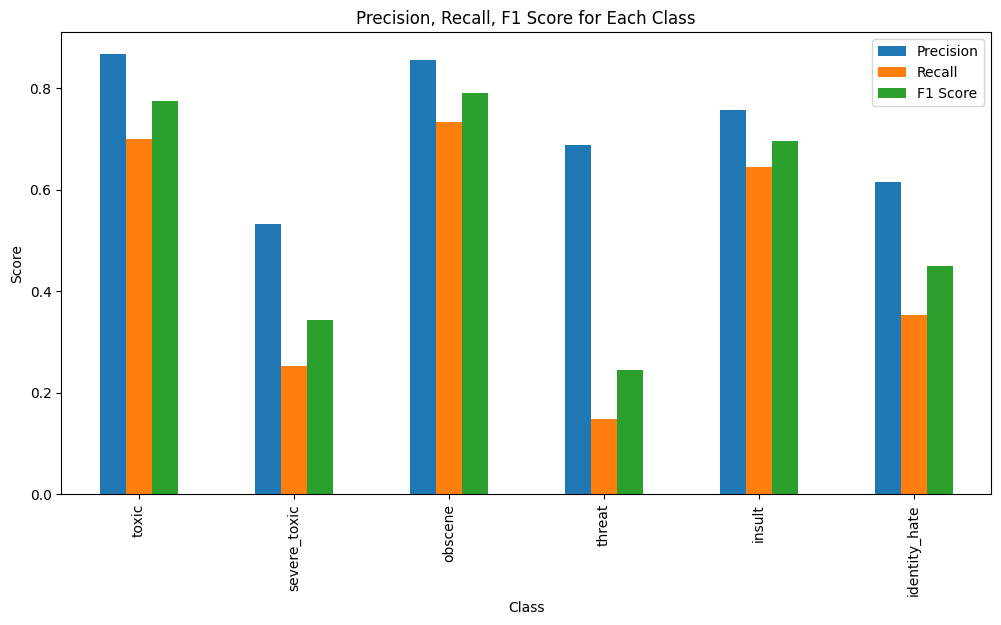

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
import numpy as np
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, SpatialDropout1D
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Replace non-numeric values in label columns with 0
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data[label_columns] = data[label_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Function to clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

# Apply cleaning function to the comment_text column
data['cleaned_comment_text'] = data['comment_text'].apply(clean_text)

# Extract features and labels
X = data['cleaned_comment_text']
y = data[label_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters for LSTM model
max_num_words = 20000
max_sequence_length = 200
embedding_dim = 100

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(data['cleaned_comment_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Use pre-trained GloVe embeddings
embedding_index = {}
with open('/content/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            if coefs.shape[0] == embedding_dim:
                embedding_index[word] = coefs
        except ValueError:
            print(f"Skipping line for word: {word}")

word_index = tokenizer.word_index
num_words = min(max_num_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None and len(embedding_vector) == embedding_dim:
        embedding_matrix[i] = embedding_vector

# Build the original LSTM model
model = Sequential()
model.add(Embedding(max_num_words, embedding_dim, input_length=max_sequence_length, weights=[embedding_matrix], trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(6, activation='sigmoid'))  # 6 output nodes for 6 labels

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the LSTM model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Save the model and tokenizer
model.save('lstm_model_with_glove_simple.h5')
with open('tokenizer_with_glove_simple.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load the saved model
model = load_model('lstm_model_with_glove_simple.h5')

# Load the saved tokenizer
with open('tokenizer_with_glove_simple.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Make predictions on the test data
predictions = model.predict(X_test_pad)

# Convert predictions to binary outcomes (threshold = 0.5)
y_pred = (predictions > 0.5).astype(int)

# Ensure y_test and y_pred are numpy arrays with consistent format
y_test_np = y_test.to_numpy()
y_pred_np = np.array(y_pred)

# Evaluate the model performance
report = classification_report(y_test_np, y_pred_np, target_names=label_columns, zero_division=0)
print(report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Precision, Recall, F1 Score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_np, y_pred_np, average=None, labels=[0, 1, 2, 3, 4, 5])
metrics_df = pd.DataFrame({
    'Class': label_columns,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})
print(metrics_df)

# Plot Precision, Recall, F1 Score for each class
metrics_df.plot(kind='bar', x='Class', figsize=(12, 6))
plt.title('Precision, Recall, F1 Score for Each Class')
plt.ylabel('Score')
plt.show()


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load the LSTM model and tokenizer
model = load_model('lstm_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize and pad sequences
max_sequence_length = 100

# Define prediction function
def predict_lstm(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    return {labels[i]: float(prediction[0][i]) for i in range(len(labels))}

# Create Gradio interface for LSTM model
interface_lstm = gr.Interface(
    fn=predict_lstm,
    inputs=gr.Textbox(lines=2, placeholder='Enter comment text here...'),
    outputs=gr.Label(num_top_classes=6),
    title="LSTM Classifier",
    description="Enter a comment to classify its toxicity using the LSTM model."
)

# Launch the Gradio interface for LSTM model
interface_lstm.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2296e5cf6977313d8e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
